In [102]:
## the basic information about datasets

df1 = pd.read_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\data.csv", header=None, low_memory=False)
print(df1.describe())
print(df1.info())

df2 = pd.read_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\feature_meta_matching.csv", header=None, low_memory=False)
print(df2.describe())
print(df2.info())

df3 = pd.read_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\Y.csv", header=None, low_memory=False)
print(df3.describe())
print(df3.info())

                  0             1            2            3             4    \
count            1334          1335         1335         1335          1335   
unique           1334          1327         1326         1329          1327   
top     pos.result.20  -0.005575437  0.091286982  0.044695534  -0.052678117   
freq                1             9           10            7             9   

                5            6            7            8            9    ...  \
count          1335         1335         1335         1335         1335  ...   
unique         1329         1326         1330         1326         1328  ...   
top     0.122634431  0.089028093  0.049038804  0.371507054  0.164689996  ...   
freq              7           10            6           10            8  ...   

                691          692          693          694          695  \
count          1335         1335         1335         1335         1335   
unique         1269         1264         1269        

In [183]:
import pandas as pd

## change the column and row of this file
df1 = pd.read_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\data.csv", header=None, low_memory=False)
df1 = df1.transpose()
df1.to_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\data_process_init.csv", index=False)




In [257]:
df1 = pd.read_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\data_process_init.csv", header=None, low_memory=False)
df2 = pd.read_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\Y.csv", header=None)
rows_with_none = df2[df2.isnull().any(axis=1)].index
df2.drop(rows_with_none, inplace=True)
df1.drop(rows_with_none, inplace=True)
df1.to_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\data_process.csv", index=False)
df2.to_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\Y_process.csv", index=False)



In [258]:
df1 = pd.read_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\data_process.csv", header=None, low_memory=False)
df2 = pd.read_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\Y_process.csv", header=None)
rows_with_d0 = df2[df2.iloc[:, 4] != 'd0'].index.tolist()
df2.drop(rows_with_d0, inplace=True)
df1.drop(rows_with_d0, inplace=True)
df1.to_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\data_process.csv", index=False)
df2.to_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\Y_process.csv", index=False)

In [259]:
df1 = pd.read_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\data_process.csv", header=None, low_memory=False)
df2 = pd.read_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\Y_process.csv", header=None)
rows_with_zero_cov = df2[df2.iloc[:, 3] == 0].index
df2.replace({'Yes': 1, 'No': 0}, inplace=True)
df2.drop(rows_with_zero_cov, inplace=True)
df1.drop(rows_with_zero_cov, inplace=True)
df1.to_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\data_process.csv", index=False)
df2.to_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\Y_process.csv", index=False)

In [261]:
df2 = pd.read_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\Y_process.csv", header=None)
print(df2.describe())
print(df2.info())

                0    1    2    3    4
count         270  270  270  270  270
unique        270   10    3    3    2
top     row index    3    0    1   d0
freq            1   43  136  243  269
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       270 non-null    object
 1   1       270 non-null    object
 2   2       270 non-null    object
 3   3       270 non-null    object
 4   4       270 non-null    object
dtypes: object(5)
memory usage: 10.7+ KB
None


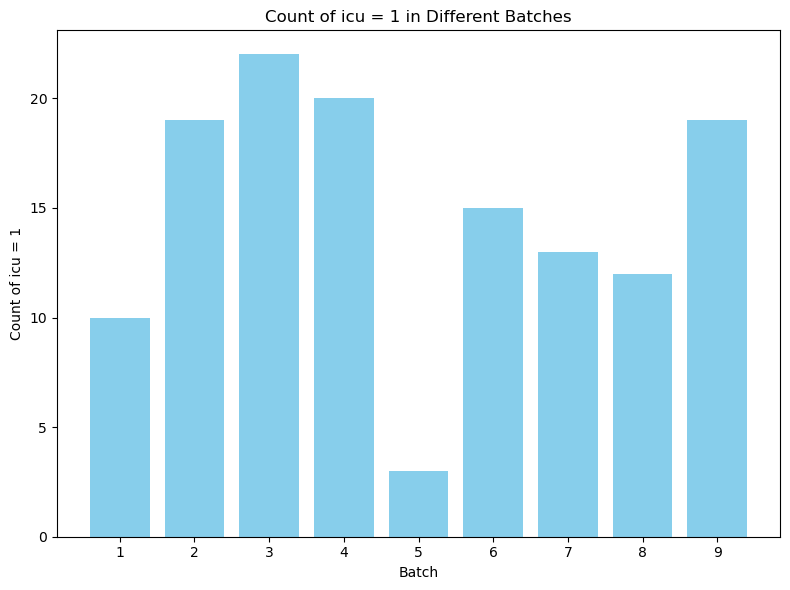

In [215]:
import matplotlib.pyplot as plt
df2 = pd.read_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\Y_process.csv", header=None)

# 计算不同批次中 icu 等于 1 的个数
batch_icu_count = {}
for i in range(len(df2.iloc[:, 1])):
    batch = df2.iloc[:, 1][i]
    icu =df2.iloc[:, 2][i]
    if icu == "1":
        if batch not in batch_icu_count:
            batch_icu_count[batch] = 1
        else:
            batch_icu_count[batch] += 1

# 将结果转换为两个列表以便绘图
batches = list(batch_icu_count.keys())
icu_counts = list(batch_icu_count.values())

# 绘制柱状图
plt.figure(figsize=(8, 6))
plt.bar(batches, icu_counts, color='skyblue')
plt.xlabel('Batch')
plt.ylabel('Count of icu = 1')
plt.title('Count of icu = 1 in Different Batches')
plt.xticks(batches)
plt.tight_layout()

# 显示图形
plt.show()

In [216]:
import pandas as pd
from scipy.stats import chi2_contingency

cross_tab = pd.crosstab(df2.iloc[:, 1], df2.iloc[:, 2])

chi2, p, _, _ = chi2_contingency(cross_tab)

print(f"卡方统计量: {chi2}")
print(f"P值: {p}")

卡方统计量: 287.66211493812614
P值: 1.6479137078372822e-50


The following are plots of PCA


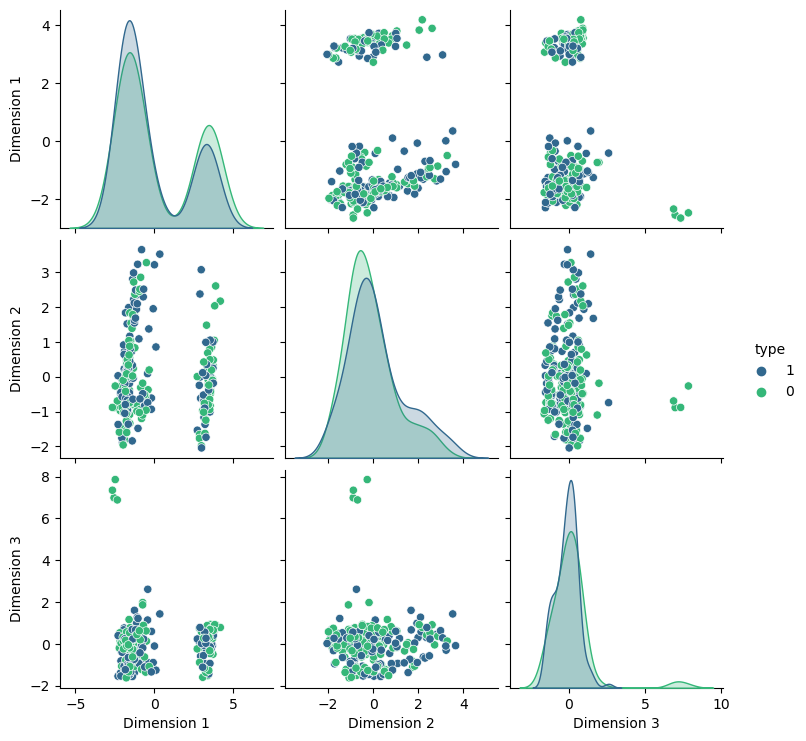

The following are plots of t-SNE


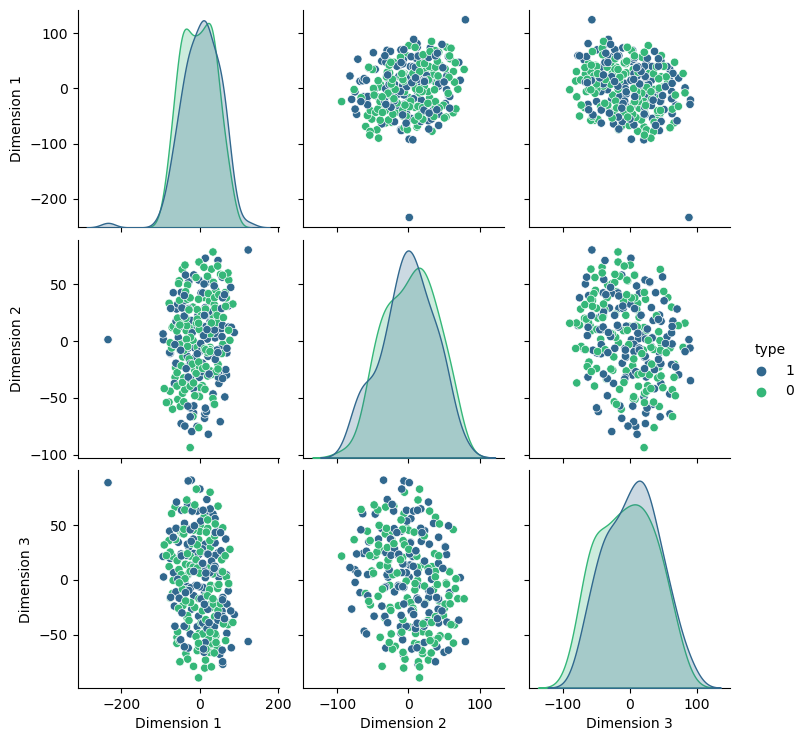

In [218]:
## dimension reduction--figure out the potential pattern of data
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df2 = pd.read_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\Y_process.csv", header=None)
reduced_data_all = pd.read_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\data_process.csv", header=None, low_memory=False)  
icu_type_labels = df2.iloc[1:, 2]  
reduced_data = reduced_data_all.iloc[2:, 1:1334]
reduced_data = scaler.fit_transform(reduced_data)

warnings.filterwarnings("ignore", category=FutureWarning)

methods = {
    'PCA': PCA(n_components=3),
    't-SNE': TSNE(n_components=3),
}

for method_name, method in methods.items():
    reduced_features = method.fit_transform(reduced_data)
    reduced_df = pd.DataFrame(reduced_features, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
    #reduced_df = pd.DataFrame(reduced_features, columns=['Dimension 1', 'Dimension 2'])
    reduced_df["type"] = icu_type_labels
    print(f"The following are plots of {method_name}")
    sns.pairplot(reduced_df, hue='type', palette='viridis')
    #plt.title(f"Pairwise plot using {method_name}")
    plt.show()



In [255]:
# using point biserial correlation coefficient to get important features
import pandas as pd
from scipy import stats
import statsmodels.stats.multitest as smt

binary_data = df2.iloc[2:, 2]
features = df1.iloc[1:, 1:1334]

binary_data = pd.to_numeric(binary_data, errors='coerce').dropna()

correlation_results = {}
p_values = []
#print(feature.columns)
# for each feature, calculate the coefficient and p-value
for col in features.columns:
    feature_data = pd.to_numeric(features[col], errors='coerce').dropna()
    min_length = min(len(binary_data), len(feature_data))
    binary_data_aligned = binary_data.head(min_length)
    feature_data_aligned = feature_data.head(min_length)

    point_biserial_corr, p_value = stats.pointbiserialr(binary_data_aligned, feature_data_aligned)
    correlation_results[col] = (point_biserial_corr, p_value)
    p_values.append(p_value)

important_features = []
feat_names = []

for i, col in enumerate(features.columns):
    #if abs(adjusted_p_values[i]) < 0.1:
    if p_values[i] < 0.05:
        important_features.append(col)
        feat_names.append(df1.iloc[0, col])

print("The selected features and corresponding p-values are：")
for i, name in zip(important_features, feat_names):
    print(f"{name}: p-value = {p_values[i-1]}")

print(f"\nThere are total {len(important_features)} selected features")
print(feat_names)

The selected features and corresponding p-values are：
pos.result.20: p-value = 0.012717481654073657
pos.result.138: p-value = 0.03763264340167824
pos.result.189: p-value = 0.03663066369551978
pos.result.337: p-value = 0.0036069776691023646
pos.result.399: p-value = 0.010868834120880326
pos.result.521: p-value = 0.0027591607156680796
pos.result.641: p-value = 0.028592438408128324
pos.result.699: p-value = 0.01831142099370475
pos.result.755: p-value = 0.01120271229552434
pos.result.768: p-value = 0.03697525780288257
pos.result.844: p-value = 0.04614830900842779
pos.result.908: p-value = 0.014821176508931503
pos.result.923: p-value = 0.012259100935687375
pos.result.969: p-value = 0.021736952590751098
pos.result.1166: p-value = 0.02760318129288138
pos.result.1255: p-value = 0.002950111201233991
pos.result.1293: p-value = 0.048099853421388374
pos.result.1343: p-value = 0.04994449216890428
pos.result.1350: p-value = 0.020761271901235546
pos.result.1375: p-value = 0.027493039406730743
pos.res

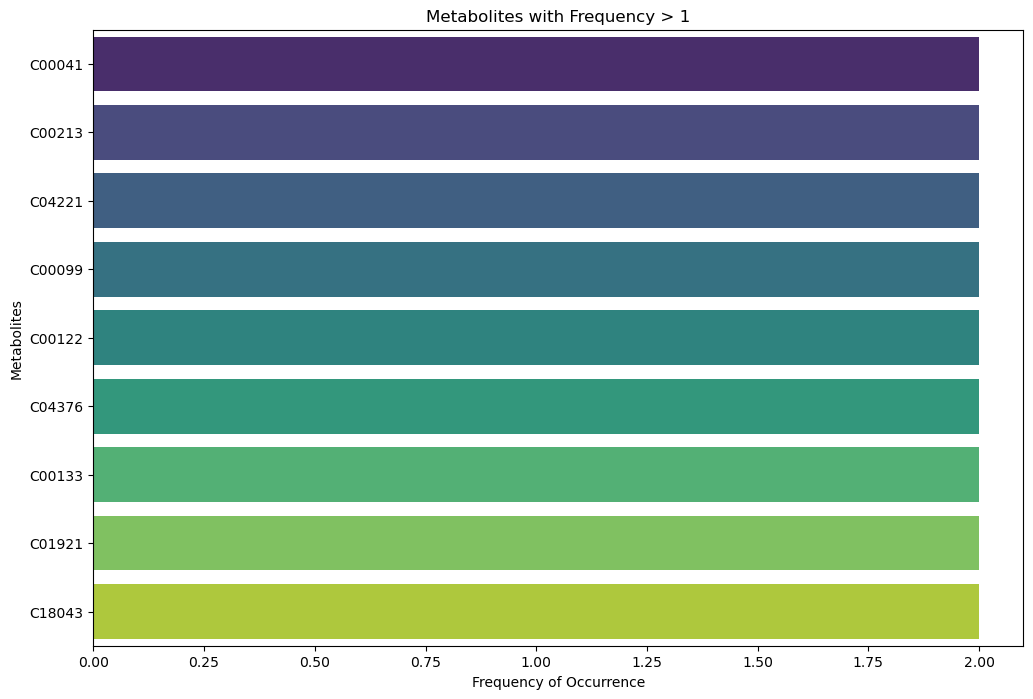

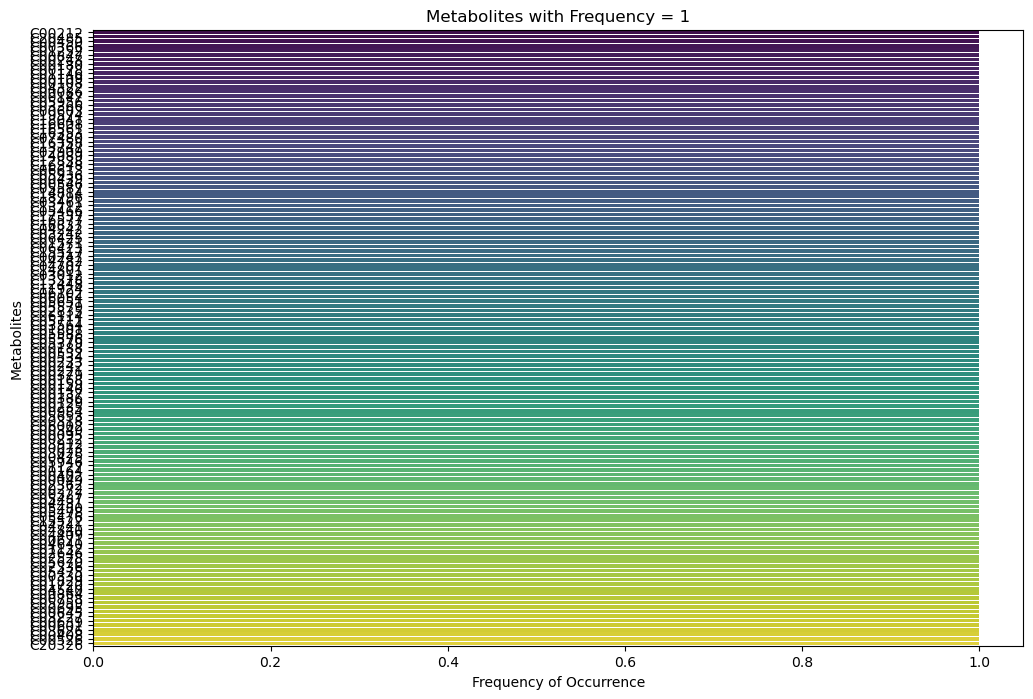

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_features_rf = feat_names

selected_features_df = feature_meta_df[feature_meta_df['Unnamed: 0'].isin(feat_names)]
selected_features_df = selected_features_df.drop(columns=['Unnamed: 0'])

metabolite_frequencies = selected_features_df.sum()

sorted_metabolites_2 = metabolite_frequencies[metabolite_frequencies > 1].sort_values(ascending=False)

sorted_metabolites_1 = metabolite_frequencies[metabolite_frequencies == 1].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_metabolites_2.values, y=sorted_metabolites_2.index, palette="viridis")
plt.title("Metabolites with Frequency > 1")
plt.xlabel("Frequency of Occurrence")
plt.ylabel("Metabolites")
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_metabolites_1.values, y=sorted_metabolites_1.index, palette="viridis")
plt.title("Metabolites with Frequency = 1")
plt.xlabel("Frequency of Occurrence")
plt.ylabel("Metabolites")
plt.show()

In [263]:
p_values_with_names = [(col, p_values[i]) for i, col in enumerate(features.columns)]

p_values_with_names.sort(key=lambda x: x[1])

top_10_features = p_values_with_names[:10]

print("Top 10 important features based on p-values:")
for col, p_value in top_10_features:
    feature_name = df1.iloc[1][col]  
    print(f"{feature_name}: p-value = {p_value}")

Top 10 important features based on p-values:
2.738641182: p-value = 0.00011382422289988696
3.265808278: p-value = 0.0011293815882906693
7.365726353: p-value = 0.001371344581279244
5.337207186: p-value = 0.0014851398776327877
9.494204473: p-value = 0.0027591607156680796
11.97116549: p-value = 0.002950111201233991
0.378072659: p-value = 0.003131968838149904
8.720924592: p-value = 0.0036069776691023646
9.878160026: p-value = 0.005742305770207012
13.0412871: p-value = 0.005756654991201084


In [223]:
## build a new file only containing selected important features

selected_features_data = df1.iloc[:, important_features]
selected_features_data.to_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\selected_features_p.csv", index=False)



In [224]:
df3 = pd.read_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\selected_features_p.csv", header=None)
features = df3.iloc[1:, :83]
labels = df3.iloc[1:, 84]


In [225]:
## classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

scaler = MinMaxScaler()

features = scaler.fit_transform(features) ## scale

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
## deal with imbalance:
from imblearn.over_sampling import SMOTE

# 应用SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [281]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

xgb_clf = xgb.XGBClassifier(
    max_depth=20, 
    n_estimators=175, 
    learning_rate=0.01, 
    use_label_encoder=False, 
    eval_metric='logloss'    
)

y_train_smote = y_train_smote.astype(int)
y_test = y_test.astype(int)
xgb_clf.fit(X_train_smote, y_train_smote)

y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("XGBoost Accuracy:", accuracy)
print("XGBoost Precision:", precision)
print("XGBoost Recall:", recall)
print("XGBoost F1 Score:", f1)

XGBoost Accuracy: 0.717391304347826
XGBoost Precision: 0.720952380952381
XGBoost Recall: 0.7196969696969697
XGBoost F1 Score: 0.7172576832151301


In [227]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

param_grid_svc = {
    'C': [0.1, 1, 10, 20],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

param_grid_rf = {
    'n_estimators': [100, 175, 250],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [5, 10, 15, 20]
}

param_grid_nn = {
    'hidden_layer_sizes': [(25,), (50,), (25, 2)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, verbose=2, n_jobs=-1)
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, verbose=2, n_jobs=-1)
grid_search_nn = GridSearchCV(MLPClassifier(max_iter=4000), param_grid_nn, cv=5, verbose=2, n_jobs=-1)

grid_search_svm.fit(X_train_smote, y_train_smote)
grid_search_rf.fit(X_train_smote, y_train_smote)
grid_search_nn.fit(X_train_smote, y_train_smote)

print("SVM Best Parameters:", grid_search_svm.best_params_)
print("Random Forest Best Parameters:", grid_search_rf.best_params_)
print("Neural Network Best Parameters:", grid_search_nn.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
SVM Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}
Random Forest Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 250}
Neural Network Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (25,)}


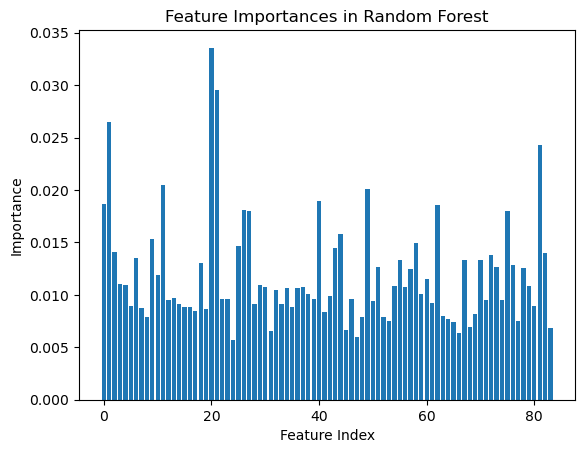

The name of top50 features:
[(0.033560850277098736, 20), (0.029554517573452, 21), (0.026505501376431078, 1), (0.024270532694528075, 81), (0.020515150988069643, 11), (0.020129691356519635, 49), (0.018939012926601037, 40), (0.018696538472446164, 0), (0.018585843485306053, 62), (0.018067649607708406, 26), (0.018005005231307068, 75), (0.01795191451245026, 27), (0.015822308492545647, 44), (0.015345965346108872, 9), (0.014897402188756424, 58), (0.014690821013862253, 25), (0.014435953770837931, 43), (0.014039812599127312, 2), (0.013966514137717939, 82), (0.013755424350770356, 72), (0.01351574958331465, 6), (0.013354129650060902, 55), (0.013351666221137683, 67), (0.013304180184077695, 70), (0.01306123699016413, 18), (0.012888932913202644, 76), (0.01269263557142535, 51), (0.012687425633111734, 73), (0.01257497782773895, 78), (0.012418523801485533, 57), (0.011920018990069078, 10), (0.011544547616722162, 60), (0.011039051604558509, 3), (0.010966226579522838, 4), (0.010927153706726773, 29), (0.010

In [283]:
## SVM, NN, random forest with cross validation
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

best_params_svm = {'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}
best_params_rf = {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 250}
best_params_nn = {'hidden_layer_sizes': (25,), 'activation': 'tanh', 'alpha': 0.0001}


svm = SVC(random_state=42, probability=True, **best_params_svm)
rf = RandomForestClassifier(random_state=42, **best_params_rf)
nn = MLPClassifier(random_state=42, max_iter=4000, **best_params_nn)
xgb_clf = xgb.XGBClassifier(
    max_depth=20, 
    n_estimators=175, 
    learning_rate=0.01, 
    use_label_encoder=False, 
    eval_metric='logloss'    
)

# 交叉验证
svm_scores = cross_val_score(svm, X_train_smote, y_train_smote, cv=5)
rf_scores = cross_val_score(rf, X_train_smote, y_train_smote, cv=5)
nn_scores = cross_val_score(nn, X_train_smote, y_train_smote, cv=5)
xgb_scores = cross_val_score(xgb_clf, X_train_smote, y_train_smote, cv=5)

rf.fit(X_train_smote, y_train_smote)

feature_importances = rf.feature_importances_
feature_names = df3.columns

plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest')
plt.show()
importances_with_names = sorted(zip(feature_importances, feature_names), reverse=True)
top_50_features = importances_with_names[:50]
print("The name of top50 features:")
print(top_50_features)
name = []
for i in top_50_features:  
    j = i[1]
    name.append(df3.iloc[0, j])
print("The corresponding features names are:")
print(name)    
print()

print("SVM Scores:", svm_scores)
print("Random Forest Scores:", rf_scores)
print("Neural Network Scores:", nn_scores)
print("XGBoost Scores:", xgb_scores)

In [230]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(model, X, y, model_name):
    y= y.astype(int)
    y_pred = cross_val_predict(model, X, y, cv=5, method='predict_proba')
    
    y_pred_label = np.argmax(y_pred, axis=1)  
    fpr, tpr, _ = roc_curve(y, y_pred[:, 1])
    roc_auc = auc(fpr, tpr)
    

    # Confusion matrix
    cm = confusion_matrix(y, y_pred_label)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, fmt="d", cmap="Blues", linewidths=.5)
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
    plt.ylabel('Actual Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.tight_layout()
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            color = "white" if i == j else "black"
            plt.text(j+0.5, i+0.5, cm[i, j], 
                     horizontalalignment='center', 
                     verticalalignment='center',
                     color=color)  

    plt.show()

    # ROC curve
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Metrics
    accuracy = accuracy_score(y, y_pred_label)
    precision = precision_score(y, y_pred_label)
    recall = recall_score(y, y_pred_label)  # Also known as sensitivity
    f1 = f1_score(y, y_pred_label)

    # Specificity: TN / (TN + FP)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall/Sensitivity: {recall:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"F1 Score: {f1:.2f}\n")

    # Classification report
    print(f"Classification Report for {model_name}:\n", classification_report(y, y_pred_label))
    
    return fpr, tpr

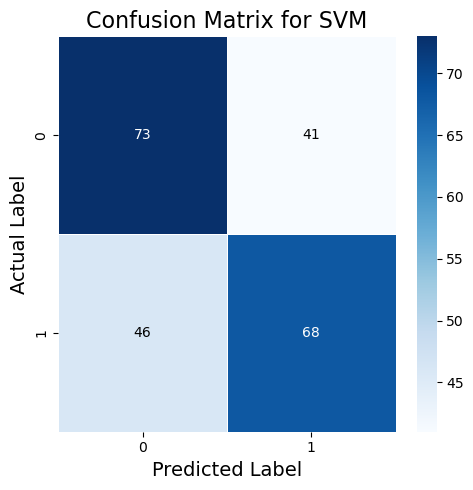

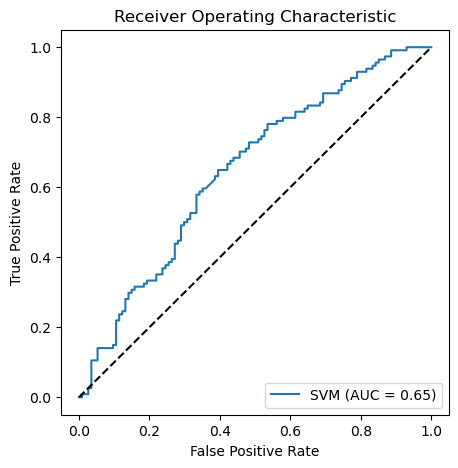

Metrics for SVM:
Accuracy: 0.62
Precision: 0.62
Recall/Sensitivity: 0.60
Specificity: 0.64
F1 Score: 0.61

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.61      0.64      0.63       114
           1       0.62      0.60      0.61       114

    accuracy                           0.62       228
   macro avg       0.62      0.62      0.62       228
weighted avg       0.62      0.62      0.62       228



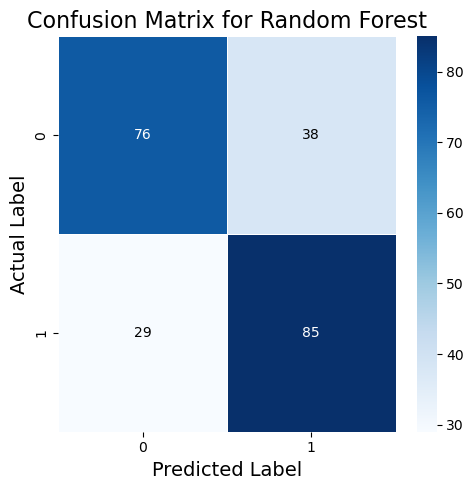

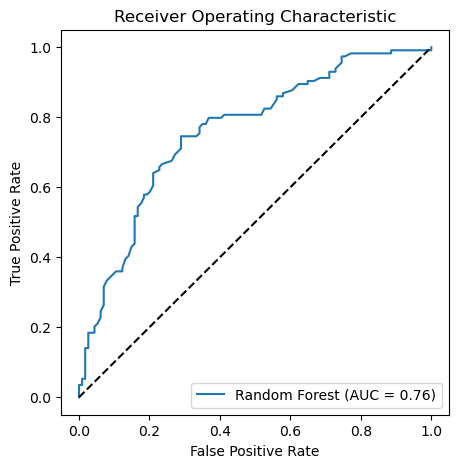

Metrics for Random Forest:
Accuracy: 0.71
Precision: 0.69
Recall/Sensitivity: 0.75
Specificity: 0.67
F1 Score: 0.72

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.72      0.67      0.69       114
           1       0.69      0.75      0.72       114

    accuracy                           0.71       228
   macro avg       0.71      0.71      0.71       228
weighted avg       0.71      0.71      0.71       228



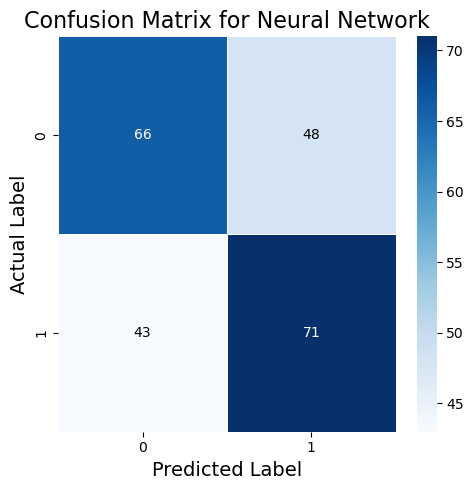

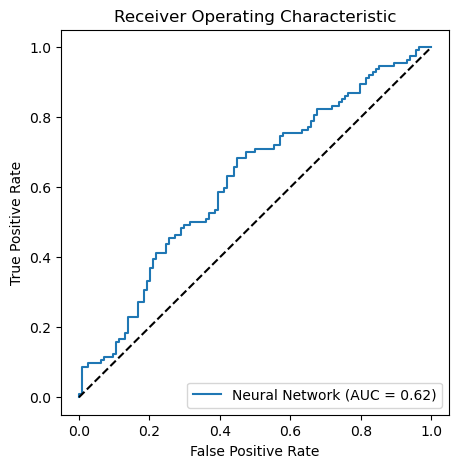

Metrics for Neural Network:
Accuracy: 0.60
Precision: 0.60
Recall/Sensitivity: 0.62
Specificity: 0.58
F1 Score: 0.61

Classification Report for Neural Network:
               precision    recall  f1-score   support

           0       0.61      0.58      0.59       114
           1       0.60      0.62      0.61       114

    accuracy                           0.60       228
   macro avg       0.60      0.60      0.60       228
weighted avg       0.60      0.60      0.60       228



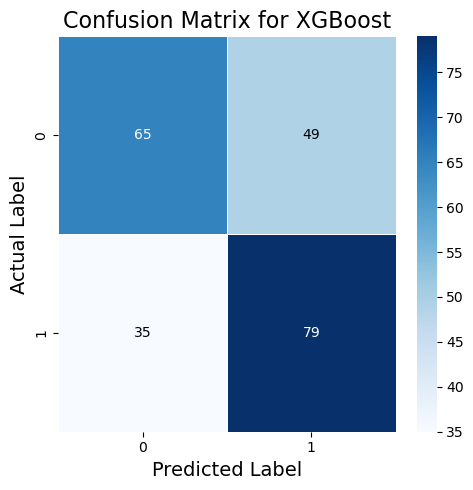

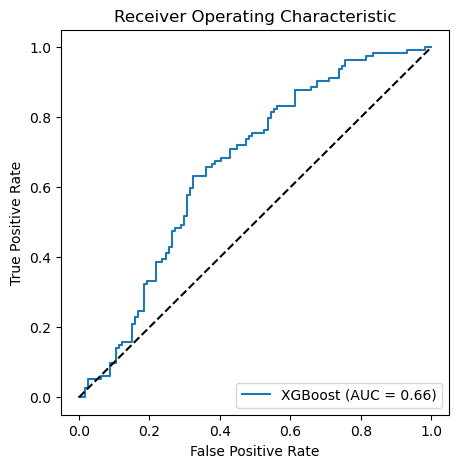

Metrics for XGBoost:
Accuracy: 0.63
Precision: 0.62
Recall/Sensitivity: 0.69
Specificity: 0.57
F1 Score: 0.65

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.65      0.57      0.61       114
           1       0.62      0.69      0.65       114

    accuracy                           0.63       228
   macro avg       0.63      0.63      0.63       228
weighted avg       0.63      0.63      0.63       228



(array([0.        , 0.00877193, 0.01754386, 0.01754386, 0.02631579,
        0.02631579, 0.06140351, 0.06140351, 0.0877193 , 0.0877193 ,
        0.10526316, 0.10526316, 0.11403509, 0.11403509, 0.12280702,
        0.12280702, 0.14912281, 0.14912281, 0.15789474, 0.15789474,
        0.16666667, 0.16666667, 0.18421053, 0.18421053, 0.19298246,
        0.19298246, 0.21929825, 0.21929825, 0.23684211, 0.23684211,
        0.24561404, 0.24561404, 0.25438596, 0.25438596, 0.26315789,
        0.26315789, 0.27192982, 0.27192982, 0.28947368, 0.28947368,
        0.29824561, 0.29824561, 0.30701754, 0.30701754, 0.31578947,
        0.31578947, 0.3245614 , 0.3245614 , 0.35964912, 0.35964912,
        0.37719298, 0.37719298, 0.38596491, 0.38596491, 0.40350877,
        0.40350877, 0.42982456, 0.42982456, 0.44736842, 0.44736842,
        0.47368421, 0.47368421, 0.48245614, 0.48245614, 0.49122807,
        0.49122807, 0.52631579, 0.52631579, 0.53508772, 0.53508772,
        0.54385965, 0.54385965, 0.55263158, 0.55

In [285]:
evaluate_model(svm, X_train_smote, y_train_smote, 'SVM')
evaluate_model(rf, X_train_smote, y_train_smote, 'Random Forest')
evaluate_model(nn, X_train_smote, y_train_smote, 'Neural Network')
evaluate_model(xgb_clf, X_train_smote, y_train_smote, 'XGBoost')

In [287]:
## stacking
from sklearn.ensemble import StackingClassifier

estimators = [
    ('svm', svm),
    ('rf', rf),
    ('nn', nn),
    ("xgb", xgb_clf)
]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacking_classifier.fit(X_train_smote, y_train_smote)

stacking_score = stacking_classifier.score(X_test, y_test)
print("Stacking Model Score:", stacking_score)

Stacking Model Score: 0.717391304347826


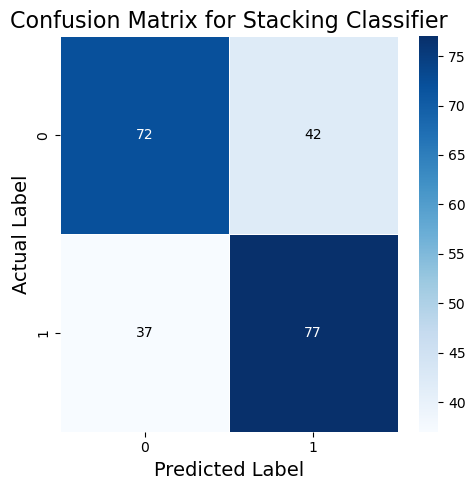

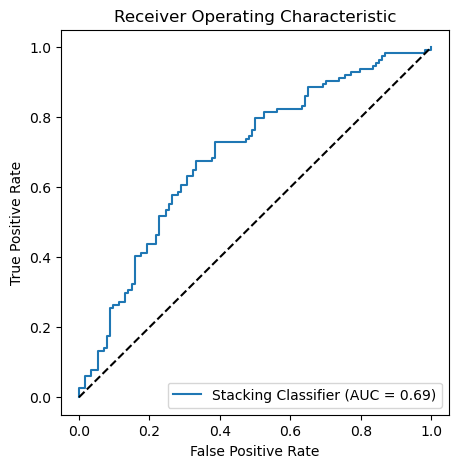

Metrics for Stacking Classifier:
Accuracy: 0.65
Precision: 0.65
Recall/Sensitivity: 0.68
Specificity: 0.63
F1 Score: 0.66

Classification Report for Stacking Classifier:
               precision    recall  f1-score   support

           0       0.66      0.63      0.65       114
           1       0.65      0.68      0.66       114

    accuracy                           0.65       228
   macro avg       0.65      0.65      0.65       228
weighted avg       0.65      0.65      0.65       228



(array([0.        , 0.        , 0.        , 0.01754386, 0.01754386,
        0.03508772, 0.03508772, 0.05263158, 0.05263158, 0.07017544,
        0.07017544, 0.07894737, 0.07894737, 0.0877193 , 0.0877193 ,
        0.09649123, 0.09649123, 0.11403509, 0.11403509, 0.13157895,
        0.13157895, 0.14035088, 0.14035088, 0.14912281, 0.14912281,
        0.15789474, 0.15789474, 0.1754386 , 0.1754386 , 0.19298246,
        0.19298246, 0.21929825, 0.21929825, 0.22807018, 0.22807018,
        0.24561404, 0.24561404, 0.25438596, 0.25438596, 0.26315789,
        0.26315789, 0.28070175, 0.28070175, 0.28947368, 0.28947368,
        0.30701754, 0.30701754, 0.3245614 , 0.3245614 , 0.33333333,
        0.33333333, 0.37719298, 0.37719298, 0.38596491, 0.38596491,
        0.47368421, 0.47368421, 0.48245614, 0.48245614, 0.49122807,
        0.49122807, 0.5       , 0.5       , 0.52631579, 0.52631579,
        0.56140351, 0.56140351, 0.63157895, 0.63157895, 0.64035088,
        0.64035088, 0.64912281, 0.64912281, 0.69

In [288]:
evaluate_model(stacking_classifier, X_train_smote, y_train_smote, 'Stacking Classifier')

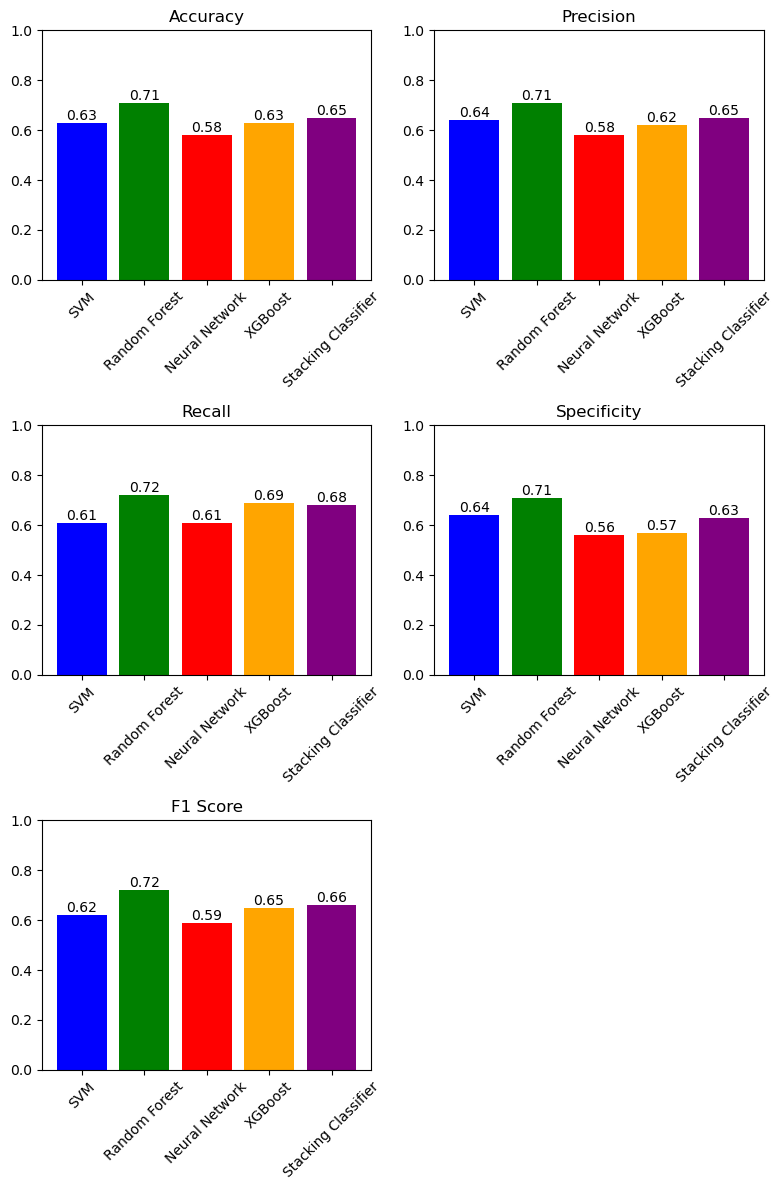

In [293]:
import matplotlib.pyplot as plt

colors = {
    "SVM": "blue",
    "Random Forest": "green",
    "Neural Network": "red",
    "XGBoost": "orange",
    "Stacking Classifier": "purple"
}

metric_names = ["Accuracy", "Precision", "Recall", "Specificity", "F1 Score"]

metrics = {
    "SVM": {"Accuracy": 0.63, "Precision": 0.64, "Recall": 0.61, "Specificity": 0.64, "F1 Score": 0.62},
    "Random Forest": {"Accuracy": 0.71, "Precision": 0.71, "Recall": 0.72, "Specificity": 0.71, "F1 Score": 0.72},
    "Neural Network": {"Accuracy": 0.58, "Precision": 0.58, "Recall": 0.61, "Specificity": 0.56, "F1 Score": 0.59},
    "XGBoost": {"Accuracy": 0.63, "Precision": 0.62, "Recall": 0.69, "Specificity": 0.57, "F1 Score": 0.65},
    "Stacking Classifier": {"Accuracy": 0.65, "Precision": 0.65, "Recall": 0.68, "Specificity": 0.63, "F1 Score": 0.66}
}

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 12))
axes = axes.flatten()  
axes[-1].axis('off')  # Turn off the last subplot as we have only 5 metrics

for ax, metric in zip(axes, metric_names):
    for classifier, metrics_data in metrics.items():
        bar = ax.bar(classifier, metrics_data[metric], color=colors[classifier])
        ax.bar_label(bar, fmt='%.2f')
    ax.set_title(metric)
    ax.set_ylim(0.0, 1.0)  
    ax.set_xticks(range(len(metrics)))  
    ax.set_xticklabels(metrics.keys(), rotation=45) 
plt.tight_layout()
plt.show()

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_meta_df = pd.read_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\feature_meta_matching.csv")

feature_meta_df.head()


,Unnamed: 0,C01083,C00185,C00208,C00082,C00430,C00355,C00090,C05565,C00427,...,C02659,C20326,C01876,C20640,C20695,C12287,C20775,C20836,C08492,C20183
0,pos.result.20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,pos.result.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,pos.result.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pos.result.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,pos.result.49,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [244]:
selected_features_rf = name
selected_features_df = feature_meta_df[feature_meta_df['Unnamed: 0'].isin(name)]
selected_features_df = selected_features_df.drop(columns=['Unnamed: 0'])

metabolite_frequencies = selected_features_df.sum()

sorted_metabolites = metabolite_frequencies.sort_values(ascending=False)

# Extracting the top 30 metabolites for visualization
top_30_metabolites = sorted_metabolites.head(30)

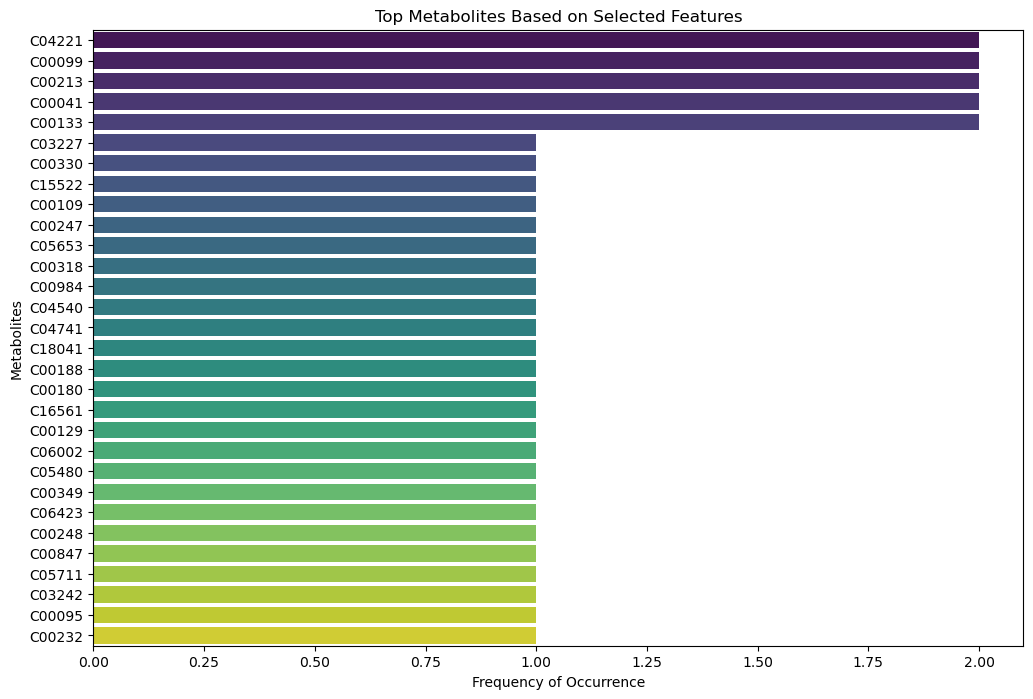

In [245]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_30_metabolites.values, y=top_30_metabolites.index, palette="viridis")

plt.title("Top Metabolites Based on Selected Features")
plt.xlabel("Frequency of Occurrence")
plt.ylabel("Metabolites")

plt.show()

In [290]:
## 尝试加入batch信息作为特征进行分类,但从结果看并没有什么效果
df3 = pd.read_csv("D:\\是大学啦\\STA\\sta4606\\final\\final_proj_data\\selected_features_p.csv", header=None)
features = df3.iloc[1:, :84]
labels = df3.iloc[1:, 84]

In [291]:
## classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

scaler = MinMaxScaler()

features = scaler.fit_transform(features) ## scale

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [292]:
## deal with imbalance:
from imblearn.over_sampling import SMOTE

# 应用SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

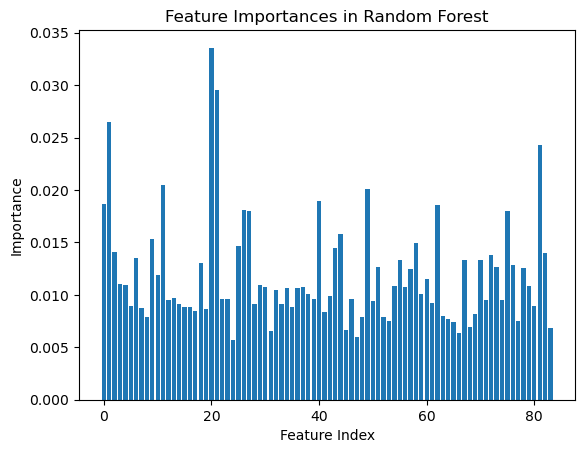

The name of top50 features:
[(0.033560850277098736, 20), (0.029554517573452, 21), (0.026505501376431078, 1), (0.024270532694528075, 81), (0.020515150988069643, 11), (0.020129691356519635, 49), (0.018939012926601037, 40), (0.018696538472446164, 0), (0.018585843485306053, 62), (0.018067649607708406, 26), (0.018005005231307068, 75), (0.01795191451245026, 27), (0.015822308492545647, 44), (0.015345965346108872, 9), (0.014897402188756424, 58), (0.014690821013862253, 25), (0.014435953770837931, 43), (0.014039812599127312, 2), (0.013966514137717939, 82), (0.013755424350770356, 72), (0.01351574958331465, 6), (0.013354129650060902, 55), (0.013351666221137683, 67), (0.013304180184077695, 70), (0.01306123699016413, 18), (0.012888932913202644, 76), (0.01269263557142535, 51), (0.012687425633111734, 73), (0.01257497782773895, 78), (0.012418523801485533, 57), (0.011920018990069078, 10), (0.011544547616722162, 60), (0.011039051604558509, 3), (0.010966226579522838, 4), (0.010927153706726773, 29), (0.010

In [249]:
## SVM, NN, random forest with cross validation
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

best_params_svm = {'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}
best_params_rf = {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 250}
best_params_nn = {'hidden_layer_sizes': (25,), 'activation': 'tanh', 'alpha': 0.0001}

svm = SVC(random_state=42, probability=True, **best_params_svm)
rf = RandomForestClassifier(random_state=42, **best_params_rf)
nn = MLPClassifier(random_state=42, max_iter=4000, **best_params_nn)

# 交叉验证
svm_scores = cross_val_score(svm, X_train_smote, y_train_smote, cv=5)
rf_scores = cross_val_score(rf, X_train_smote, y_train_smote, cv=5)
nn_scores = cross_val_score(nn, X_train_smote, y_train_smote, cv=5)

rf.fit(X_train_smote, y_train_smote)

feature_importances = rf.feature_importances_
feature_names = df3.columns

plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest')
plt.show()
importances_with_names = sorted(zip(feature_importances, feature_names), reverse=True)
top_50_features = importances_with_names[:50]
print("The name of top50 features:")
print(top_50_features)
name = []
for i in top_50_features:  ##不要这个了
    j = i[1]
    name.append(df3.iloc[0, j])
print("The corresponding features names are:")
print(name)    
print()

print("SVM Scores:", svm_scores)
print("Random Forest Scores:", rf_scores)
print("Neural Network Scores:", nn_scores)

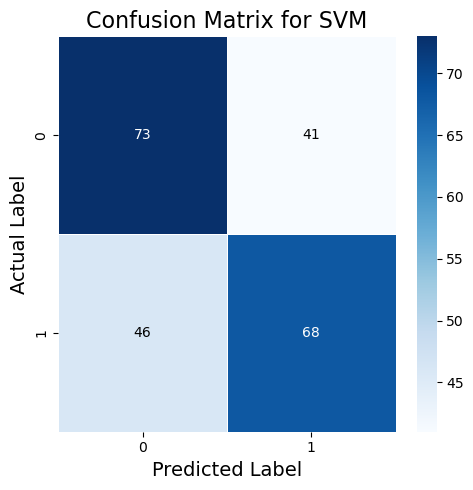

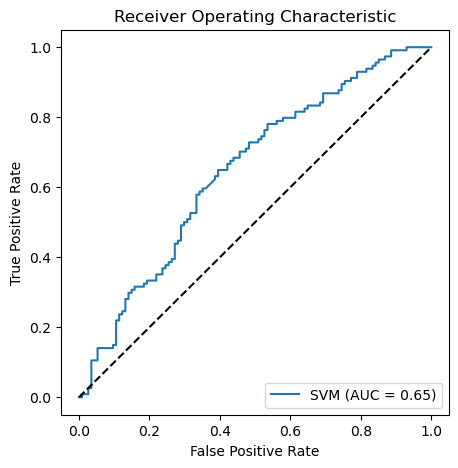

Metrics for SVM:
Accuracy: 0.62
Precision: 0.62
Recall/Sensitivity: 0.60
Specificity: 0.64
F1 Score: 0.61

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.61      0.64      0.63       114
           1       0.62      0.60      0.61       114

    accuracy                           0.62       228
   macro avg       0.62      0.62      0.62       228
weighted avg       0.62      0.62      0.62       228



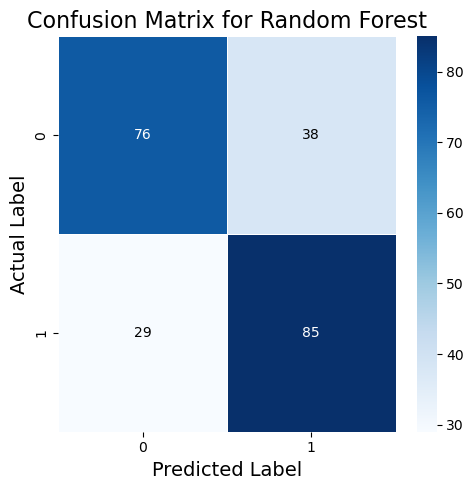

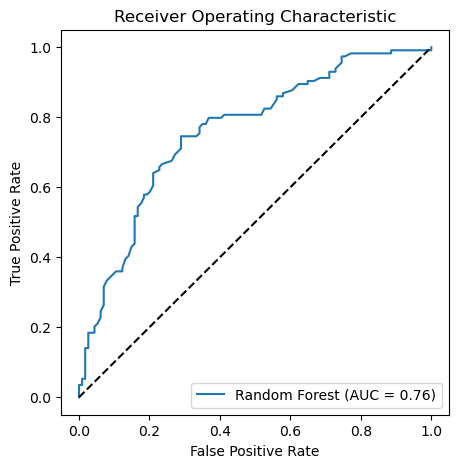

Metrics for Random Forest:
Accuracy: 0.71
Precision: 0.69
Recall/Sensitivity: 0.75
Specificity: 0.67
F1 Score: 0.72

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.72      0.67      0.69       114
           1       0.69      0.75      0.72       114

    accuracy                           0.71       228
   macro avg       0.71      0.71      0.71       228
weighted avg       0.71      0.71      0.71       228



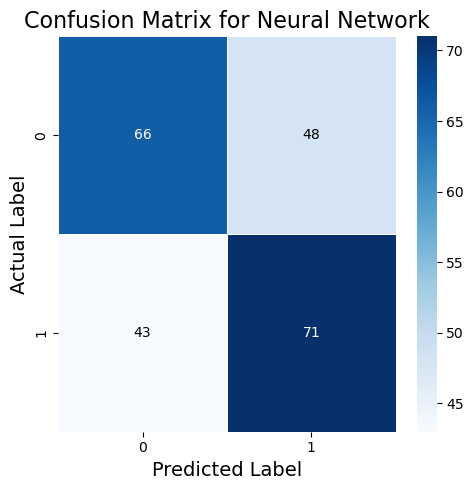

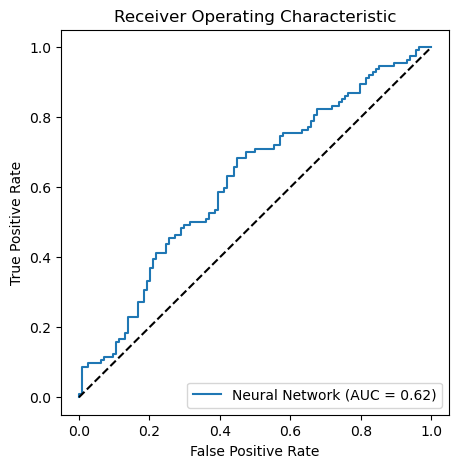

Metrics for Neural Network:
Accuracy: 0.60
Precision: 0.60
Recall/Sensitivity: 0.62
Specificity: 0.58
F1 Score: 0.61

Classification Report for Neural Network:
               precision    recall  f1-score   support

           0       0.61      0.58      0.59       114
           1       0.60      0.62      0.61       114

    accuracy                           0.60       228
   macro avg       0.60      0.60      0.60       228
weighted avg       0.60      0.60      0.60       228



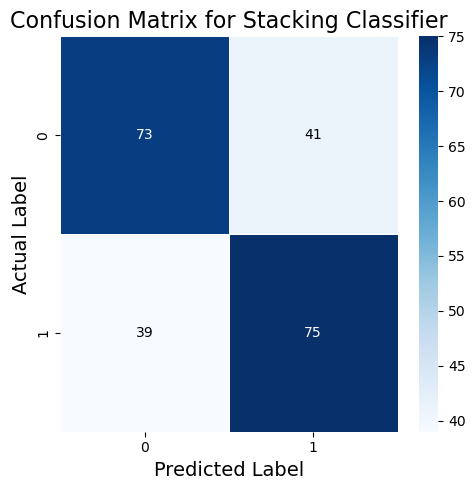

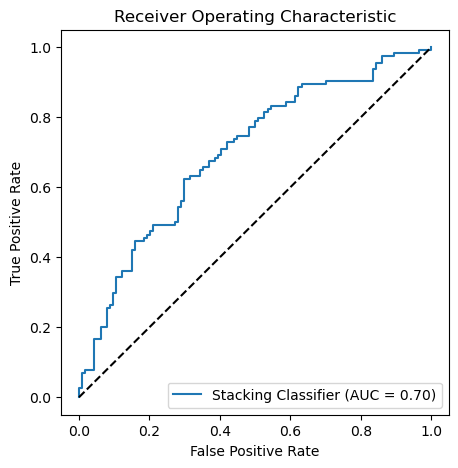

Metrics for Stacking Classifier:
Accuracy: 0.65
Precision: 0.65
Recall/Sensitivity: 0.66
Specificity: 0.64
F1 Score: 0.65

Classification Report for Stacking Classifier:
               precision    recall  f1-score   support

           0       0.65      0.64      0.65       114
           1       0.65      0.66      0.65       114

    accuracy                           0.65       228
   macro avg       0.65      0.65      0.65       228
weighted avg       0.65      0.65      0.65       228



(array([0.        , 0.        , 0.        , 0.00877193, 0.00877193,
        0.01754386, 0.01754386, 0.04385965, 0.04385965, 0.06140351,
        0.06140351, 0.07894737, 0.07894737, 0.0877193 , 0.0877193 ,
        0.09649123, 0.09649123, 0.10526316, 0.10526316, 0.12280702,
        0.12280702, 0.14912281, 0.14912281, 0.15789474, 0.15789474,
        0.18421053, 0.18421053, 0.19298246, 0.19298246, 0.20175439,
        0.20175439, 0.21052632, 0.21052632, 0.27192982, 0.27192982,
        0.28070175, 0.28070175, 0.28947368, 0.28947368, 0.29824561,
        0.29824561, 0.31578947, 0.31578947, 0.34210526, 0.34210526,
        0.35087719, 0.35087719, 0.36842105, 0.36842105, 0.38596491,
        0.38596491, 0.39473684, 0.39473684, 0.40350877, 0.40350877,
        0.42105263, 0.42105263, 0.43859649, 0.43859649, 0.44736842,
        0.44736842, 0.48245614, 0.48245614, 0.5       , 0.5       ,
        0.50877193, 0.50877193, 0.52631579, 0.52631579, 0.53508772,
        0.53508772, 0.54385965, 0.54385965, 0.58

In [250]:
evaluate_model(svm, X_train_smote, y_train_smote, 'SVM')
evaluate_model(rf, X_train_smote, y_train_smote, 'Random Forest')
evaluate_model(nn, X_train_smote, y_train_smote, 'Neural Network')
evaluate_model(stacking_classifier, X_train_smote, y_train_smote, 'Stacking Classifier')